In [62]:
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
import numpy as np

In [63]:
def calcul_hexa_centers(img,taille):
    colonnes, lignes = img.size
    hexa_centers = []
    p_horizontal=3*taille*0.5
    p_vertical=np.sqrt(3)*taille
    I = int(colonnes/p_horizontal) + 2 #I est le nombre de centres par ligne
    J = int(lignes/p_vertical) + 2 #J est le nombre de centres par colonne
    for i in range(I):
        for j in range(J):
            if i%2==0:
                hexa_centers.append((int(i*p_horizontal) ,int(j*p_vertical)))
            else:
                hexa_centers.append((int(i*p_horizontal),int((j*p_vertical)+p_vertical/2)))
    return hexa_centers

(-0.5, 195.5, 196.5, -0.5)

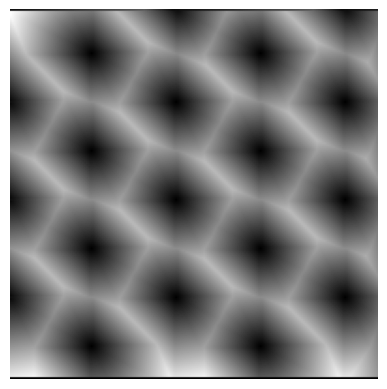

In [70]:
im = Image.new(mode='L',size=(200,200),color=255)
colonnes,lignes = im.size
carte = np.full((lignes,colonnes),10000)

for c in calcul_hexa_centers(im,30):
    if(c[0]<lignes and c[1]<colonnes):
        im.putpixel(c,0)
        carte[c[1]][c[0]]=0

#im.putpixel((4,4),0)
#carte[4][4]=0

mask1= np.array([10000,11,10000,11,7,5,10000,5,0,11,7,10000,10000,11,10000])
mask1=mask1.reshape((5,3))

for x in range(lignes-4):
    for y in range(colonnes-2):
        distances_possibles=[]
        for i in range(5):
            for j in range(3):
                distances_possibles.append(carte[x+i][y+j]+mask1[i][j])
        carte[x+2][y+2]=min(distances_possibles)

carte[0][0]=np.min([carte[0][0],carte[0][1]+1,carte[1][0]+1])
carte[0][colonnes-1]=np.min([carte[0][colonnes-1],carte[0][2]+1,carte[1][colonnes-1]+1])
carte[lignes-1][0]=np.min([carte[lignes-1][0],carte[lignes-2][0]+1,carte[lignes-1][1]+1])
carte[lignes-1][colonnes-1]=np.min([carte[lignes-1][colonnes-1],carte[lignes-2][colonnes-1]+1,carte[lignes-1][colonnes-2]+1])

for x in range (1,lignes-1):
    carte[x][0]=np.min([carte[x][0],carte[x][1]+1,carte[x+1][0]+1,carte[x-1][0]+1])
    carte[x][colonnes-1]=np.min([carte[x][colonnes-1],carte[x][colonnes-2]+1,carte[x-1][colonnes-1]+1,carte[x+1][colonnes-1]+1])
for y in range(1,colonnes-1):
    carte[0][y]=np.min([carte[0][y],carte[0][y-1]+1,carte[0][y+1]+1,carte[1][y]+1])


mask2= np.array([10000,11,10000,10000,7,11,0,5,10000,5,7,11,10000,11,10000])
mask2 = mask2.reshape((5,3))

for x in range(lignes-5,-1,-1):
    for y in range(colonnes-3,-1,-1):
        distances_possibles=[]
        for i in range(5):
            for j in range(3):
                distances_possibles.append(carte[x+i][y+j]+mask2[i][j])
        carte[x+2][y] = min(distances_possibles)

#Correction des effets de bords
carte[0][0]=np.min([carte[0][0],carte[0][1]+1,carte[1][0]+1])
carte[0][colonnes-1]=np.min([carte[0][colonnes-1],carte[0][2]+1,carte[1][colonnes-1]+1])
carte[lignes-1][0]=np.min([carte[lignes-1][0],carte[lignes-2][0]+1,carte[lignes-1][1]+1])
carte[lignes-1][colonnes-1]=np.min([carte[lignes-1][colonnes-1],carte[lignes-2][colonnes-1]+1,carte[lignes-1][colonnes-2]+1])
for x in range (1,lignes-1):
    carte[x][0]=np.min([carte[x][0],carte[x][1]+1,carte[x+1][0]+1,carte[x-1][0]+1])
    carte[x][colonnes-1]=np.min([carte[x][colonnes-1],carte[x][colonnes-2]+1,carte[x-1][colonnes-1]+1,carte[x+1][colonnes-1]+1])
for y in range(1,colonnes-1):
    carte[lignes-1][y]=np.min([carte[lignes-1][y],carte[lignes-1][y-1]+1,carte[lignes-1][y+1]+1,carte[lignes-2][y]+1])

new_card = np.zeros((lignes,colonnes))
for i in range(len(carte)):
    for j in range(len(carte[i])):
        if carte[i][j] <=255:
            new_card[i][j] = carte[i][j]
        else:
            new_card[i][j] = 0


plt.imshow(new_card[2:lignes-1,2:colonnes-2],cmap='gray')
plt.axis('off')
#plt.grid()